# TP Regression logistique

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
from math import log
import math

In [76]:
def mesh(X, h = 0.02):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return np.c_[xx.ravel(), yy.ravel()], xx, yy


## Création d'un problème jouet

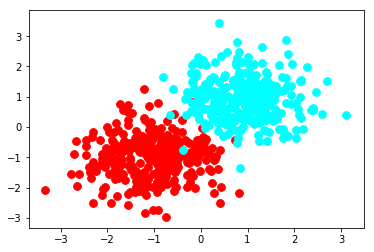

In [77]:
n_train = 300
sigma = 0.7
m1 = np.array([-1,-1])
m2 = np.array([1,1])

X1 = sigma * np.random.randn(n_train,2) + m1
X2 = sigma*np.random.randn(n_train,2) + m2

X = np.concatenate((X1,X2),axis=0)
y = np.concatenate((np.zeros((n_train)),np.ones((n_train))), axis = 0)
plt.scatter(X1[:,0],X1[:,1],c = 'r', s= 60)
plt.scatter(X2[:,0],X2[:,1],c = 'cyan', s= 60)
plt.show()



1.   Créer une fonction d'optimisation avec pour  gd_log_reg(X, y, nb_iter, pas,beta = 0.9) 


Text(0.5, 1.0, "l'evolution de cout")

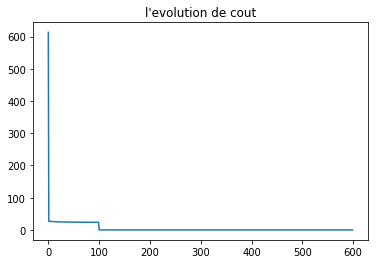

In [78]:
def log_reg_cout(X,w,y):
    z = X@w 
   
    # inserer votre code
    cout = np.sum(np.log(1 + np.exp(-z))) + np.sum(y*z) 
  
    return cout

def gradient(X,y,w):
    grad = 0
    z = X@w
    
    for i in range(len(X)):
        s = X[i] * (y[i] - math.exp(-z[i])/(1 + math.exp(-z[i])))
        grad += s
    return grad

d = X.shape[1]
w = np.random.randn(d)
nb_iter = 100
pas = 0.01
beta = 0.9
cout_l = np.zeros(X.shape[0])

for i in range(nb_iter):
    z = X@w 
    # inserer votre code
    cout_l[i] = log_reg_cout(X,w,y)
    grad = gradient(X,y,w)
    w = w - pas*grad
    
    #print(cout_l)
    
plt.plot(cout_l)
plt.title("l'evolution de cout")

Affichage de la fonction de décision et proposer un code permettant de tester la performance
de votre modèle sur des données de test à créer





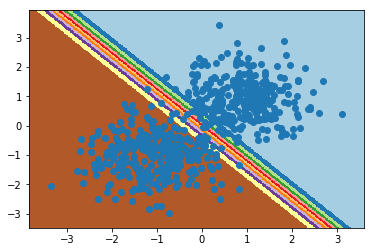

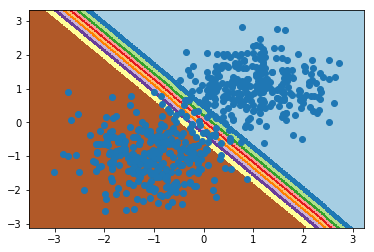

In [79]:
# creation des donnees de test pour la fonction de decision
xtest_grid, xx, yy  = mesh(X)
Z = 1/(1+ np.exp(-xtest_grid@w))

Z = Z.reshape(xx.shape)
plt.figure(2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1])
#plt.contour(xx, yy, Z, cmap=plt.cm.Paired, level=[0.5])
plt.show()


# inserer votre code ici pour créer les données de test suivant les memes
# lois de probabilités que les données d'apprentissage

n_test = 300
sigma = 0.7

X_test1 = sigma * np.random.randn(n_test,2) + m1
X_test2 = sigma*np.random.randn(n_test,2) + m2

X_test = np.concatenate((X_test1,X_test2),axis=0)
y_test = np.concatenate((np.zeros((n_test)),np.ones((n_test))), axis = 0)

# creation des donnees de test pour la fonction de decision
xtest_grid, xx, yy  = mesh(X_test)
Z = 1/(1+ np.exp(-xtest_grid@w))

Z = Z.reshape(xx.shape)
plt.figure(3)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_test[:,0],X_test[:,1])
#plt.contour(xx, yy, Z, cmap=plt.cm.Paired, level=[0.5])
plt.show()


1.   Proposer une méthode utilisant les probabilités des classes pour faire du rejet en ambiguité
2.   Illustrer le fonctionnnement de la méthode sur le problème jouet



In [80]:
# inserer votre code ici
def proba_class1(X, w):
    z = w@X
    p = 1 - 1/(1+math.exp(z))
    return p

def proba_class2(X, w):
    z = w@X
    p = 1/(1 + math.exp(-z))
    return p


y_pred = np.zeros(len(y))
for i in range (len(X_test)):
    if(proba_class1(X_test[i], w) > 0.7):
        y_pred[i] = 0
    elif(proba_class2(X_test[i], w) < 0.3):
        y_pred[i] = 1
    else: 
        y_pred[i] = 2
        
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [81]:
def taux_err(y, ypred):
    rej = 0
    err = 0
    l_y = len(y)
    for i in range(l_y):
        if y_pred[i] == 2:
            rej += 1
            #continue
        elif y_pred[i] != y[i]:
            err += 1
    
    return rej/l_y, err/l_y

rejet, error = taux_err(y, y_pred)

In [82]:
print("le taux d'erreur sur les données de test est de:", error)
print("le taux de rejet est de:", rejet)
print("le score est de :", 1 - error)

le taux d'erreur sur les données de test est de: 0.02
le taux de rejet est de: 0.021666666666666667
le score est de : 0.98


## Comparaison sklearn



1.   Comparer vos resultats  à ceux de sklearn en mode graphique et en perf sur les données de test




In [83]:
clf = linear_model.LogisticRegression(random_state=7).fit(X, y)

/home/antoine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
y_predskl = clf.predict(X_test)
print("score : ", clf.score(X_test, y_test))

score :  0.9716666666666667


In [85]:
error, rejet = taux_err(y_test, y_predskl)
print("le taux d'erreur sur les données de test: ", error)
print("le taux de rejet: ", rejet)
print("le score est de :", 1 - error)

le taux d'erreur sur les données de test:  0.021666666666666667
le taux de rejet:  0.02
le score est de : 0.9783333333333333


Nous remarquons que les resultats de sklearn et ce que nous avons implementé ne sont pas très loin. Nous avons donc obtenu une bonne performance

## Diagnostic médical

On cherche à prédire la survenue d'un cancer à partir de paramètre médical. 
L'objectif de cette partie est de mettre en oeuvre votre algorithme de régression
logistique et une méthodologie valide 


1.   On séparera les données en partie apprentissage et test pour valider l'approche (on donne le resultat de classification 
moyen et l'écart-type sur 10 essais)
2.   Proposer un algorithme pour de la regression logistique régularisée (ou utiliser sklearn, sous la condition de spécifier quel est le problème résolu par l'*algorithme*)
3.   Appliquer votre algorithme sur ce jeu de donnée en suivant  une méthodologie utilisant une séparation en apprentissage 



In [86]:
def log_reg_cout(X,w,y, lamda):
    z = X@w 
   
    # inserer votre code
    cout = np.sum(np.log(1 + np.exp(-z))) + np.sum(y*z) + lamda*np.linalg.norm(w)
  
    return cout

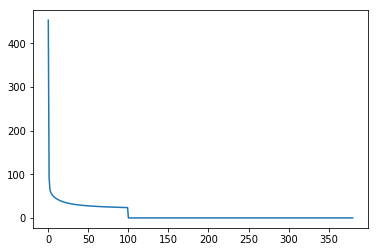

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



data = load_breast_cancer()

X = data.data
y = data.target
t_score = []
t_rejet = []
t_error = []

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for i in range(nb_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    Xstd = scaler.fit_transform(X_train)
    Xtest_std = scaler.fit_transform(X_test)
    
    d = Xstd.shape[1]
    w = np.random.randn(d)
    nb_iter = 100
    pas = 0.01
    beta = 0.9
    cout_l = np.zeros(Xstd.shape[0])

    for i in range(nb_iter):
        z = Xstd@w 
        # inserer votre code
        lamda = 0.5
        cout_l[i] = log_reg_cout(Xstd,w,y_train,lamda)
        grad = gradient(Xstd,y_train,w)
        w = w - pas*grad
        
        
    y_pred = np.zeros(len(y))
    for i in range (len(Xtest_std)):
        if(proba_class1(Xtest_std[i], w) >= 0.7):
            y_pred[i] = 0
        elif(proba_class2(Xtest_std[i], w) < 0.3):
            y_pred[i] = 1
        else: 
            y_pred[i] = 2
            
    rejet, error = taux_err(y_test, y_pred)
    t_score.append(1 - error)
    t_rejet.append(rejet)
    t_error.append(error)
        
plt.plot(cout_l) 
# inserer votre code 

In [88]:
print("le taux d'erreur moyen sur les données de test est de:", np.mean(t_error))
print("le taux de rejet moyen est de:", np.mean(t_rejet))
print("le score moyen est de :", np.mean(t_score))

le taux d'erreur moyen sur les données de test est de: 0.007234042553191489
le taux de rejet moyen est de: 0.022765957446808517
le score moyen est de : 0.9927659574468085
